<a href="https://colab.research.google.com/github/ustab/NFL/blob/main/DVwPy_EDA_Project_(Analyze_US_Citizens)_F_1218_BUSTA_V01_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe

In [51]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS/EDA_1/adult_eda.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
df.shape

(32561, 15)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [54]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000,32561.000,31759.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.083,1077.649,87.304,40.437
std,13.640,105549.978,2.576,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [55]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [56]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [57]:
df.duplicated().sum()

24

In [58]:
df.duplicated().sum()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [59]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [60]:
df.shape

(32537, 15)

In [61]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


In [63]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000,-0.076,0.035,0.078,0.058,0.069
fnlwgt,-0.076,1.000,-0.044,0.000,-0.010,-0.019
education-num,0.035,-0.044,1.000,0.124,0.080,0.148
capital-gain,0.078,0.000,0.124,1.000,-0.032,0.078
capital-loss,0.058,-0.010,0.080,-0.032,1.000,0.054
hours-per-week,0.069,-0.019,0.148,0.078,0.054,1.000


Rename the features of;
"education-num", "marital-status", "capital-gain", "capital-loss", "hours-per-week", "native-country" as
"education_num", "marital_status", "capital_gain", "capital_loss", "hours_per_week", "native_country", respectively and permanently.

In [64]:
df.replace(to_replace =["education-num", "marital-status", "capital-gain", "capital-loss", "hours-per-week", "native-country"], value = ["e-num", "m-status", "c-gain", "c-loss", "h-p-week", "n-country"])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [65]:
df.reindex(["e_num", "m_status", "c_gain", "c_loss", "h_pr_week", "n_country"], axis="columns")

,e_num,m_status,c_gain,c_loss,h_pr_week,n_country
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN
32557,NaN,NaN,NaN,NaN,NaN,NaN
32558,NaN,NaN,NaN,NaN,NaN,NaN
32559,NaN,NaN,NaN,NaN,NaN,NaN


Check the sum of Missing Values per column


In [66]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [67]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [68]:
null_cols = df.columns[df.isnull().all()]
df.drop(null_cols, axis = 1, inplace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


Check the Percentage of Missing Values

In [69]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
percent_missing
missing_value_df.T


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
column_name,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
percent_missing,0.000,0.000,0.000,0.000,2.465,0.000,0.000,15.564,0.000,0.000,0.000,0.000,0.000,0.000,0.000


2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [70]:
df.describe(include='object')#just object v

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [71]:
df.describe(include=[np.object])#just object v

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [72]:
df.describe(include=[np.number])#just numeric values

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000,32537.000,31735.000,32537.000,32537.000,32537.000
mean,38.586,189780.849,10.084,1078.444,87.368,40.440
std,13.638,105556.471,2.575,7387.957,403.102,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,236993.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [73]:
df.describe(exclude=[np.number])#exclude numeric columns

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [74]:
#df.describe(exclude=[np.object])#exclude object values
df.describe(exclude='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000,32537.000,31735.000,32537.000,32537.000,32537.000
mean,38.586,189780.849,10.084,1078.444,87.368,40.440
std,13.638,105556.471,2.575,7387.957,403.102,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,236993.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [75]:
df[df['age'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [76]:
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13.000,Never-married,Adm-clerical,NaN,White,Female,0,0,30,United-States,<=50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
16,25,Self-emp-not-inc,176756,HS-grad,9.000,Never-married,Farming-fishing,NaN,White,Male,0,0,35,United-States,<=50K
26,19,Private,168294,HS-grad,9.000,Never-married,Craft-repair,NaN,White,Male,0,0,40,United-States,<=50K
31,20,Private,266015,Some-college,10.000,Never-married,Sales,NaN,Black,Male,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,22,Private,203715,Some-college,10.000,Never-married,Adm-clerical,NaN,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8.000,Never-married,Protective-serv,NaN,Black,Male,0,0,35,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,252208,HS-grad,9.000,Separated,Adm-clerical,NaN,White,Female,0,0,40,United-States,<=50K


In [77]:
df[df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13.000,Never-married,Adm-clerical,NaN,White,Female,0,0,30,United-States,<=50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
16,25,Self-emp-not-inc,176756,HS-grad,9.000,Never-married,Farming-fishing,NaN,White,Male,0,0,35,United-States,<=50K
26,19,Private,168294,HS-grad,9.000,Never-married,Craft-repair,NaN,White,Male,0,0,40,United-States,<=50K
31,20,Private,266015,Some-college,10.000,Never-married,Sales,NaN,Black,Male,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,22,Private,203715,Some-college,10.000,Never-married,Adm-clerical,NaN,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8.000,Never-married,Protective-serv,NaN,Black,Male,0,0,35,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,252208,HS-grad,9.000,Separated,Adm-clerical,NaN,White,Female,0,0,40,United-States,<=50K


In [78]:
df.isnull().sum().sum().sum()

5866

Univariate & Multivariate Analysis

In [79]:
df["salary"].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

In [80]:
df["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [81]:
higher_education = df.education.isin(["Bachelors", "Masters", "Doctorate"])
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32537, dtype: bool

In [82]:
df.loc[(df["education"]!="Bachelors")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14.000,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5.000,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [83]:
df["marital-status"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [84]:
df["relationship"].value_counts()

Husband           13187
Not-in-family      8292
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [85]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [86]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [87]:
df["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [88]:
country_salary_df = df.groupby("native-country")[["salary"]].count()
country_salary_df.T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,582,19,121,75,59,95,70,28,106,90,...,37,114,12,80,51,18,19,29153,67,16


In [89]:
country_salary_df_riches = df[df.salary == '>50K'].groupby("native-country")[["salary"]].count()
country_salary_df_riches.T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,146,7,39,20,2,25,2,4,9,30,...,4,12,3,16,20,3,2,7169,5,6


In [90]:
df["hours-per-week"].value_counts()

40    15204
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [91]:
df.groupby("education")["education"].count()

education
10th              933
11th             1175
12th              433
1st-4th           166
5th-6th           332
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10494
Masters          1722
Preschool          50
Prof-school       576
Some-college     7282
Name: education, dtype: int64

In [92]:
df["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

Other Specific Analysis Questions

1. What is the average age of males and females by income level?

In [93]:
country_salary_df = df.groupby("native-country")[["salary"]].count()
country_salary_df

,salary
native-country,
?,582
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106


In [94]:
country_salary_df_riches = df[df.salary == '>50K'].groupby("native-country")[["salary"]].count()
country_salary_df_riches

,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9


In [95]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [96]:
df["hours-per-week"].value_counts()

40    15204
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [97]:
average_age_men = round(df[df.sex == "Male"]["age"].mean())
average_age_men

39

In [98]:
df["salary"].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

In [99]:
df["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [100]:
df.corr().T

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000,-0.076,0.035,0.078,0.058,0.069
fnlwgt,-0.076,1.000,-0.044,0.000,-0.010,-0.019
education-num,0.035,-0.044,1.000,0.124,0.080,0.148
capital-gain,0.078,0.000,0.124,1.000,-0.032,0.078
capital-loss,0.058,-0.010,0.080,-0.032,1.000,0.054
hours-per-week,0.069,-0.019,0.148,0.078,0.054,1.000


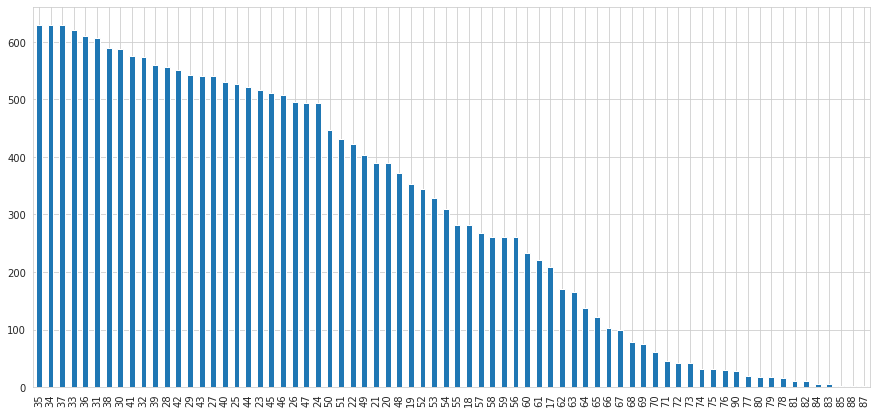

In [101]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [102]:
average_age_women = round(df[df.sex == "Female"]["age"].mean())
average_age_women

37

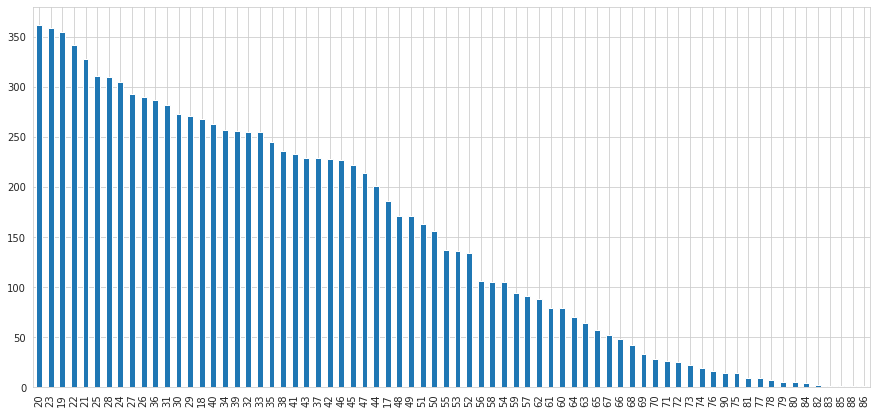

In [103]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

2. What is the workclass percentages of Americans in high-level income group?

In [104]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [105]:
df=df.replace({'?':'UNKNOWN'})
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [106]:
df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32537, dtype: object

In [107]:
df["education-num"]

0       13.000
1       13.000
2        9.000
3        7.000
4       13.000
         ...  
32556   12.000
32557    9.000
32558    9.000
32559    9.000
32560    9.000
Name: education-num, Length: 32537, dtype: float64

In [108]:
df.groupby('education')['education-num'].value_counts()

education     education-num
10th          6.000              916
11th          7.000             1146
12th          8.000              424
1st-4th       2.000              159
5th-6th       3.000              329
7th-8th       4.000              630
9th           5.000              503
Assoc-acdm    12.000            1044
Assoc-voc     11.000            1343
Bachelors     13.000            5245
Doctorate     16.000             405
HS-grad       9.000            10208
Masters       14.000            1686
Preschool     1.000               49
Prof-school   15.000             559
Some-college  10.000            7089
Name: education-num, dtype: int64

In [109]:
df["education-num"].value_counts()

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education-num, dtype: int64

In [110]:
df.education.value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [111]:
df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000,-0.076,0.035,0.078,0.058,0.069
fnlwgt,-0.076,1.000,-0.044,0.000,-0.010,-0.019
education-num,0.035,-0.044,1.000,0.124,0.080,0.148
capital-gain,0.078,0.000,0.124,1.000,-0.032,0.078
capital-loss,0.058,-0.010,0.080,-0.032,1.000,0.054
hours-per-week,0.069,-0.019,0.148,0.078,0.054,1.000


In [112]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000,32537.000,31735.000,32537.000,32537.000,32537.000
mean,38.586,189780.849,10.084,1078.444,87.368,40.440
std,13.638,105556.471,2.575,7387.957,403.102,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,236993.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [113]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
IQR 

20.0

In [114]:
upper_lim = Q3 + (IQR*1.5) 
upper_lim

78.0

In [115]:
df[df["age"] >= 78 ]["age"].value_counts()

90    42
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

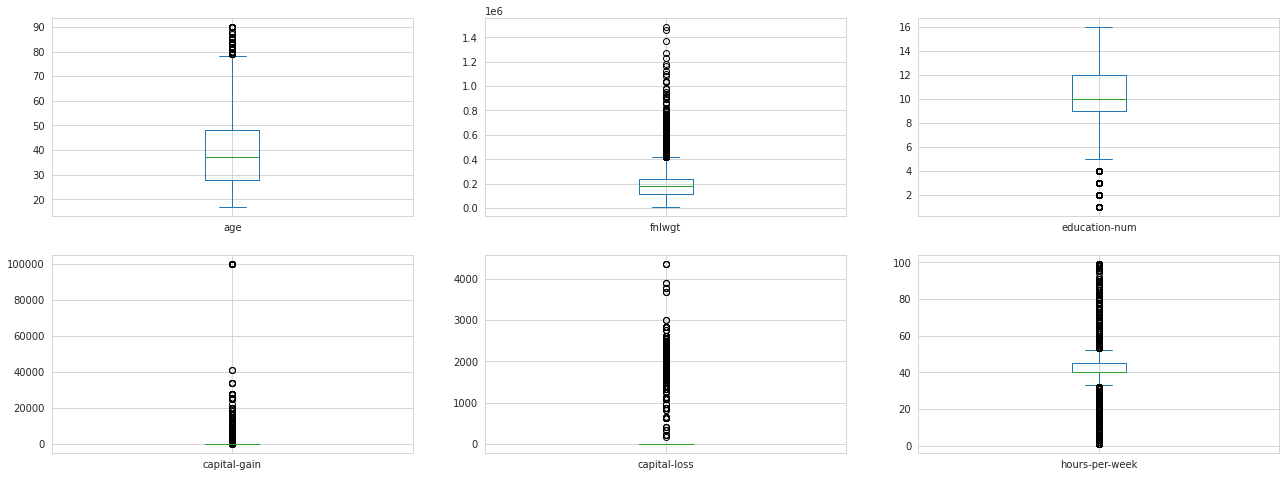

In [116]:
fig ,ax = plt.subplots(2,3,figsize=(22,8))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [117]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
22720,39,Private,237713,Prof-school,15.000,Married-civ-spouse,Sales,Husband,White,Male,0,2415,99,United-States,>50K
17611,28,Self-emp-not-inc,104617,7th-8th,4.000,Never-married,Other-service,Other-relative,White,Female,0,0,99,Mexico,<=50K
27809,30,Private,39386,Some-college,10.000,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,99,United-States,<=50K
15356,90,Private,90523,HS-grad,9.000,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
26638,55,Self-emp-not-inc,185195,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K
10986,38,Private,111499,HS-grad,9.000,Married-civ-spouse,Sales,Husband,White,Male,0,1977,99,United-States,>50K
13558,38,Private,191103,Prof-school,15.000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K
21056,64,Local-gov,142166,HS-grad,9.000,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
1172,25,Private,404616,Masters,14.000,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
8393,50,Self-emp-inc,119099,Some-college,10.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K


In [118]:
Q1_hpw = df["hours-per-week"].quantile(0.25)
Q3_hpw = df["hours-per-week"].quantile(0.75)
IQR_hpw = Q3_hpw - Q1_hpw
IQR_hpw

5.0

In [119]:
upper_lim_hpw = Q3_hpw + (IQR_hpw * 1.5) 
upper_lim_hpw

52.5

In [120]:
df[(df['hours-per-week'] >= upper_lim_hpw) & (df['age'])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10,37,Private,280464,Some-college,10.000,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
28,39,Private,367260,HS-grad,9.000,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
52,47,Private,51835,Prof-school,15.000,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
54,47,Self-emp-inc,109832,HS-grad,9.000,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
64,29,Private,105598,Some-college,10.000,Divorced,Tech-support,Not-in-family,White,Male,0,0,58,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,35,Private,30673,12th,8.000,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K
32487,51,Private,177669,Some-college,10.000,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
32520,27,Private,177398,HS-grad,9.000,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K
32530,35,UNKNOWN,320084,Bachelors,13.000,Married-civ-spouse,UNKNOWN,Wife,White,Female,0,0,55,United-States,>50K


In [121]:
drop_index= df.index[(df['hours-per-week']>=upper_lim_hpw) & (df['age']>=upper_lim)]
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 10546, 11996, 12830, 15356, 24395], dtype='int64')

In [122]:
race_count = df.race.value_counts()
race_count

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

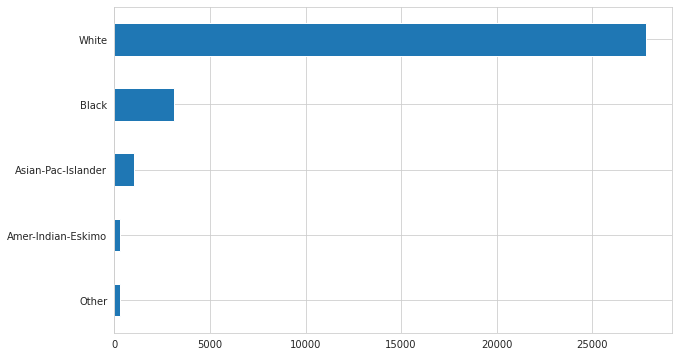

In [123]:
race_count.sort_values().plot.barh();